# Inverse problem
known: all data  
unknown: k8, ka, k5, h5  
results record: https://outlookuga-my.sharepoint.com/:x:/r/personal/yq88347_uga_edu/_layouts/15/Doc.aspx?sourcedoc=%7Be6449b96-7895-43ff-a1e4-42fc2118f900%7D&action=editnew

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import models_tf as models

In [2]:
# data = sio.loadmat("../test.mat")
data = sio.loadmat("../../data/data_2k_points.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

scale = np.array(
    [10, 1, 100, 100, 0.0001, 10, 0.1, 1000]
).reshape([-1])
c_ref = c_ref / scale
c0 = c0 / scale

In [3]:
np.max(t)

100.0

In [4]:
len(t)

2000

In [5]:
np.max(data["y"], axis=0)

array([2.99999999e+01, 3.54115121e+00, 8.57923329e+02, 1.00000000e+03,
       1.13698673e-03, 3.83874944e+01, 8.68819961e-01, 2.16923077e+03])

In [6]:
model = models.PINN(
    c0=c0,
    output_dim=8,
    scale=scale,
    units=100, 
    activation=tf.tanh,
    eps=1e-5,
)

eps:  tf.Tensor(1e-05, shape=(), dtype=float32)


In [7]:
# t_ode = t_train[::10]
# t_u = t_train
# u = c_ref
t_ode = t_train[:201]
t_u = t_train
u = c_ref
loss, ode_loss, data_loss, min_loss, h5_list = model.train(t_ode, t_u, u, niter=500000)

0 3.0151913 1304.7716 3.0021436 127310630.0 0.31665257 0.9990054
1000 0.18577798 25.528076 0.18552269 250449.67 0.23023579 0.5867927
2000 0.09176605 165.57547 0.090110295 11611295.0 0.49462533 0.29197177
3000 0.058488432 163.33179 0.056855116 383686.25 1.5949491 0.16598937
4000 0.04871667 147.095 0.047245722 413871.03 1.429563 0.102936156
5000 0.049833756 504.32635 0.04479049 39349260.0 1.1083378 0.064154215
6000 0.04489428 102.37166 0.043870565 198526.6 1.0038639 0.040562425
7000 0.04463199 103.5758 0.043596234 175658.69 1.0181922 0.025392808
8000 0.04457927 111.783005 0.043461442 870027.94 1.0308273 0.016010875
9000 0.044458456 106.40706 0.043394387 195918.81 1.0444787 0.010245792
10000 0.04441382 106.78643 0.043345954 211797.88 1.0466845 0.0066405833
11000 0.044369895 108.49495 0.043284945 284296.62 1.0565199 0.0043420475
12000 0.04430806 108.80085 0.04322005 565172.4 1.0314913 0.0028626868
13000 0.0441496 104.919754 0.0431004 1670339.1 0.88216364 0.001923371
14000 0.04368782 89.341

97000 7.562485e-06 0.007918513 7.4832997e-06 0.11874632 7.917326e-05 0.32061496
98000 1.7044855e-05 0.0053987 1.6990867e-05 0.092046104 5.3977794e-05 0.3206507
99000 7.926501e-06 0.013989997 7.786601e-06 0.09986997 0.00013988999 0.32069632
100000 2.8762126e-05 0.16297515 2.7132375e-05 0.111549854 0.0016297403 0.3206816
101000 2.4273984e-05 0.109465726 2.3179327e-05 0.11094427 0.0010946462 0.32068324
102000 3.183524e-05 0.011608607 3.1719155e-05 0.08732376 0.00011607734 0.32066455
103000 7.142493e-05 0.05123107 7.0912625e-05 0.10774786 0.00051229994 0.32073152
104000 1.0270479e-06 0.0017138732 1.0099092e-06 0.08256566 1.7130476e-05 0.3207244
105000 1.7841006e-05 0.034715604 1.749385e-05 0.11231953 0.00034714479 0.3207732
106000 1.3870038e-05 0.014739434 1.3722643e-05 0.091782406 0.00014738516 0.32079017
107000 1.8958533e-05 0.021936843 1.8739165e-05 0.062777855 0.00021936215 0.32080907
108000 8.8074175e-06 0.027563136 8.531786e-06 0.08687363 0.00027562267 0.32076272
109000 2.0570815e-05

198000 2.014152e-05 0.019037288 1.9951147e-05 2.3115737 0.00019014173 0.30821025
199000 3.8513105e-07 0.00067882193 3.7834283e-07 2.7676914 6.51145e-06 0.3080615
200000 2.0942873e-06 0.0022640647 2.0716466e-06 2.7086592 2.2369783e-05 0.30781153
201000 1.9815032e-05 0.0016916951 1.9798115e-05 2.6334162 1.6653608e-05 0.30755618
202000 1.667464e-05 0.026427625 1.6410364e-05 2.9906473 0.00026397718 0.30741942
203000 1.1996614e-06 0.0012015384 1.187646e-06 3.0170147 1.17136815e-05 0.30730474
204000 4.3483115e-07 0.00096392946 4.2519184e-07 3.259488 9.313346e-06 0.3071703
205000 7.1132895e-06 0.028425502 6.8290346e-06 3.2581913 0.0002839292 0.30707046
206000 1.7490775e-05 0.054383844 1.6946937e-05 3.4981968 0.00054348866 0.306978
207000 4.2391024e-05 0.064520776 4.1745818e-05 2.9747288 0.00064491027 0.30688116
208000 5.7405738e-05 0.004315935 5.7362577e-05 3.8000185 4.277935e-05 0.3067706
209000 3.4679863e-06 0.0025294486 3.4426919e-06 3.9719512 2.489729e-05 0.3065661
210000 2.892105e-06 0.0

300000 2.4563403e-06 0.019120215 2.2651382e-06 7.1380463 0.00019048834 0.2958279
301000 1.530801e-05 0.0074492074 1.5233518e-05 6.9552555 7.3796546e-05 0.2957928
302000 1.4428802e-05 0.003407188 1.4394731e-05 7.5006213 3.332182e-05 0.29561368
303000 2.3617473e-05 0.02132796 2.3404193e-05 6.998539 0.00021257975 0.29550615
304000 2.3488046e-06 0.004967684 2.2991278e-06 6.7353187 4.900331e-05 0.29524165
305000 1.7657247e-05 0.0062460154 1.7594786e-05 6.7409406 6.178606e-05 0.295257
306000 2.3409788e-05 0.04725418 2.2937245e-05 6.4610887 0.00047189568 0.29506004
307000 1.5005047e-06 0.005095682 1.4495479e-06 7.515534 5.0205268e-05 0.29481024
308000 2.5489576e-06 0.0013125706 2.535832e-06 7.0670524 1.2419001e-05 0.29469466
309000 5.954994e-06 0.0015874497 5.9391195e-06 7.5063896 1.5123858e-05 0.29464993
310000 4.1385742e-06 0.0018586294 4.119988e-06 7.4575315 1.784054e-05 0.29439119
311000 1.8404131e-05 0.02792867 1.8124845e-05 8.498216 0.0002784369 0.29427654
312000 1.2420638e-05 0.0409317

403000 6.866019e-07 0.00179227 6.686792e-07 9.111434 1.7011556e-05 0.29510617
404000 7.477817e-07 0.0021853421 7.259283e-07 9.169251 2.0936497e-05 0.2951333
405000 1.4529526e-06 0.0013672438 1.4392801e-06 9.193879 1.275305e-05 0.29516652
406000 1.4290921e-06 0.00083334 1.4207587e-06 9.137046 7.419695e-06 0.29519287
407000 6.728959e-07 0.0069195493 6.037004e-07 9.199602 6.8275534e-05 0.2950477
408000 2.2472586e-05 0.03303184 2.2142269e-05 8.138809 0.00032950455 0.29535428
409000 2.3893895e-07 0.00086156273 2.3032334e-07 9.209457 7.694682e-06 0.29528186
410000 1.0582244e-06 0.0015744902 1.0424794e-06 9.179366 1.48269655e-05 0.2952784
411000 4.2845957e-07 0.0036841643 3.9161793e-07 9.025973 3.5939043e-05 0.2953101
412000 2.3386735e-06 0.0040423875 2.2982497e-06 9.558496 3.9468025e-05 0.29515275
413000 4.3931996e-05 0.016660292 4.3765394e-05 10.300027 0.00016557291 0.29533893
414000 5.0331884e-05 0.022448283 5.0107403e-05 10.374926 0.00022344534 0.29514793
415000 5.01167e-05 0.033060934 4.

In [8]:
min_loss

9.882302e-08

In [9]:
model.restore()
c_pred = model.call(
    tf.constant(t_train, tf.float32),
)

In [10]:
L2 = np.sqrt(np.sum((c_pred - c_ref) ** 2, axis=0) / np.sum(c_ref ** 2, axis=0))

In [11]:
L2

array([6.56366348e-05, 5.33363310e-04, 3.79745324e-04, 2.52396200e-04,
       4.32180179e-04, 8.40607505e-04, 1.60375972e-04, 9.16049013e-05])

In [12]:
# ka = 1.2
print(tf.math.exp(model.log_ka))

tf.Tensor(1.2012982, shape=(), dtype=float32)


In [13]:
# k8 = 0.00001
print(tf.math.exp(model.log_k8))

tf.Tensor(9.44988e-06, shape=(), dtype=float32)


In [14]:
# k5 = 0.17
print(tf.math.exp(model.log_k5))

tf.Tensor(0.16997677, shape=(), dtype=float32)


In [15]:
# h5 = 0.31
print(tf.math.exp(model.log_h5))

tf.Tensor(0.30616826, shape=(), dtype=float32)


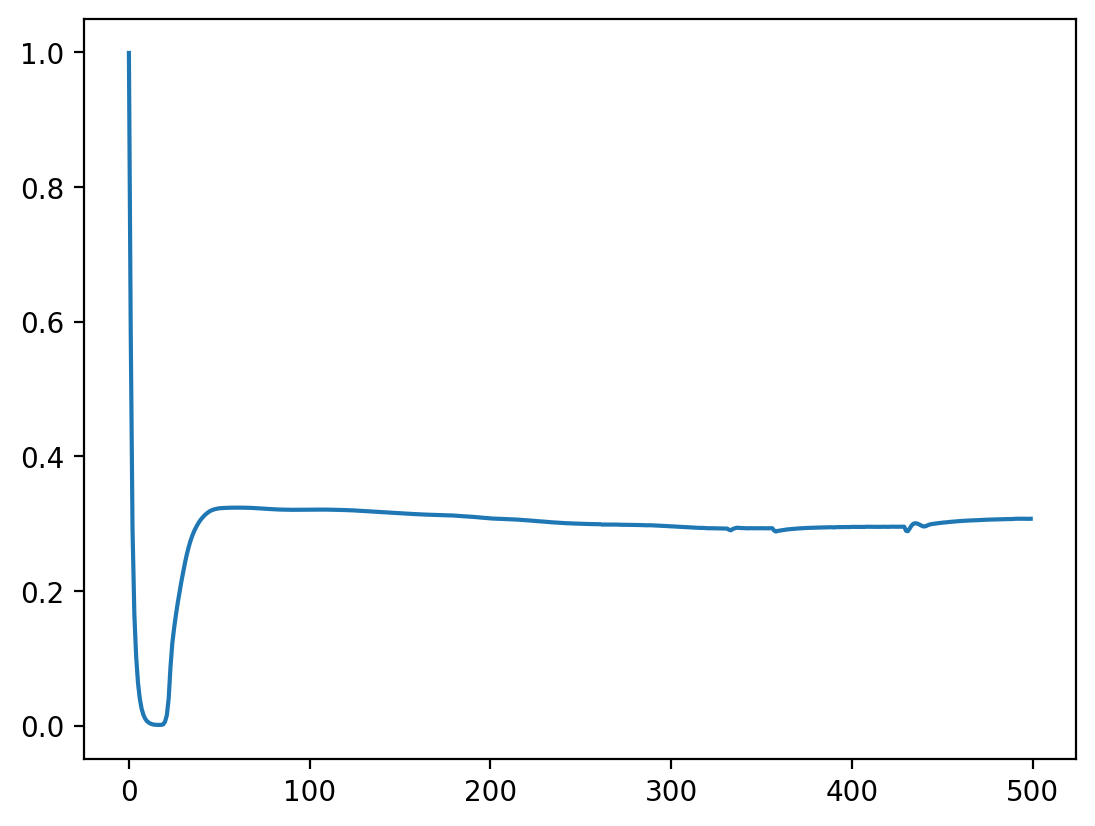

In [16]:
plt.figure(dpi=200)
plt.plot(h5_list[::1000], "-", label="reference")
# plt.plot(np.log(loss)[::1000], "-", label="reference")
plt.show()

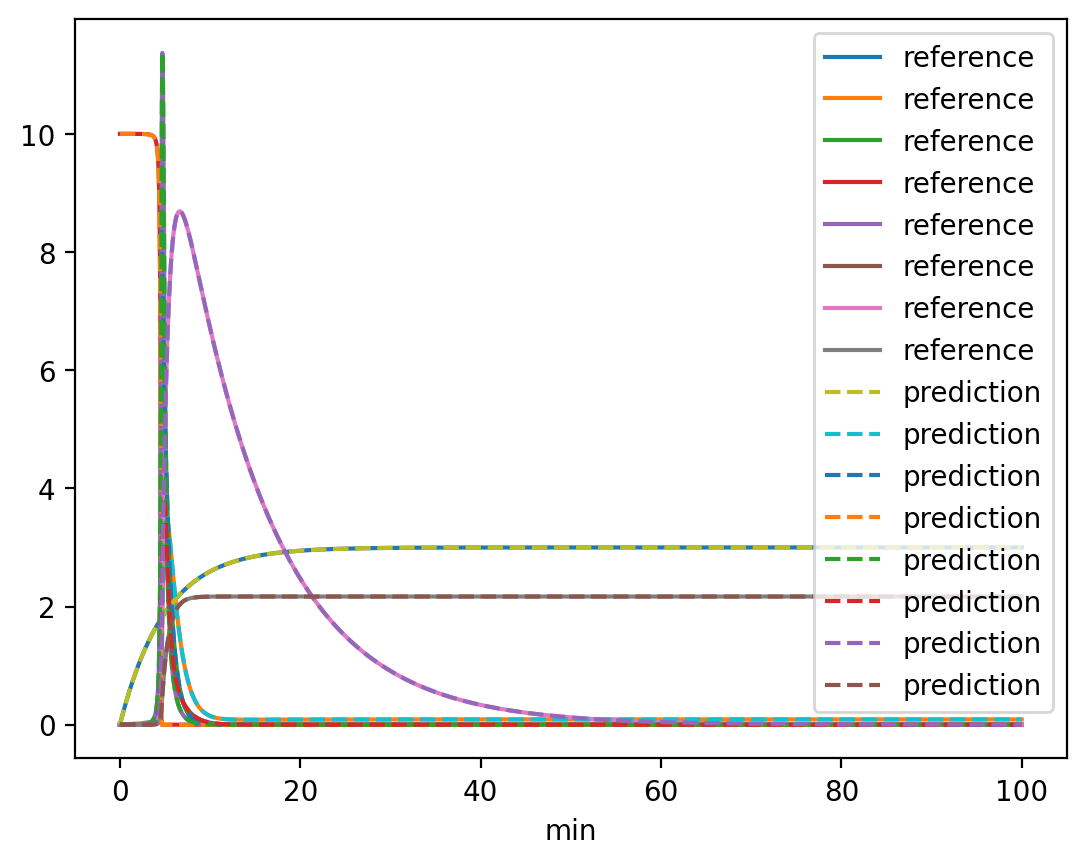

In [17]:
plt.figure(dpi=200)
plt.plot(t_train, c_ref, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred, "--", label="prediction")
plt.xlabel("min")
plt.legend()
plt.show()

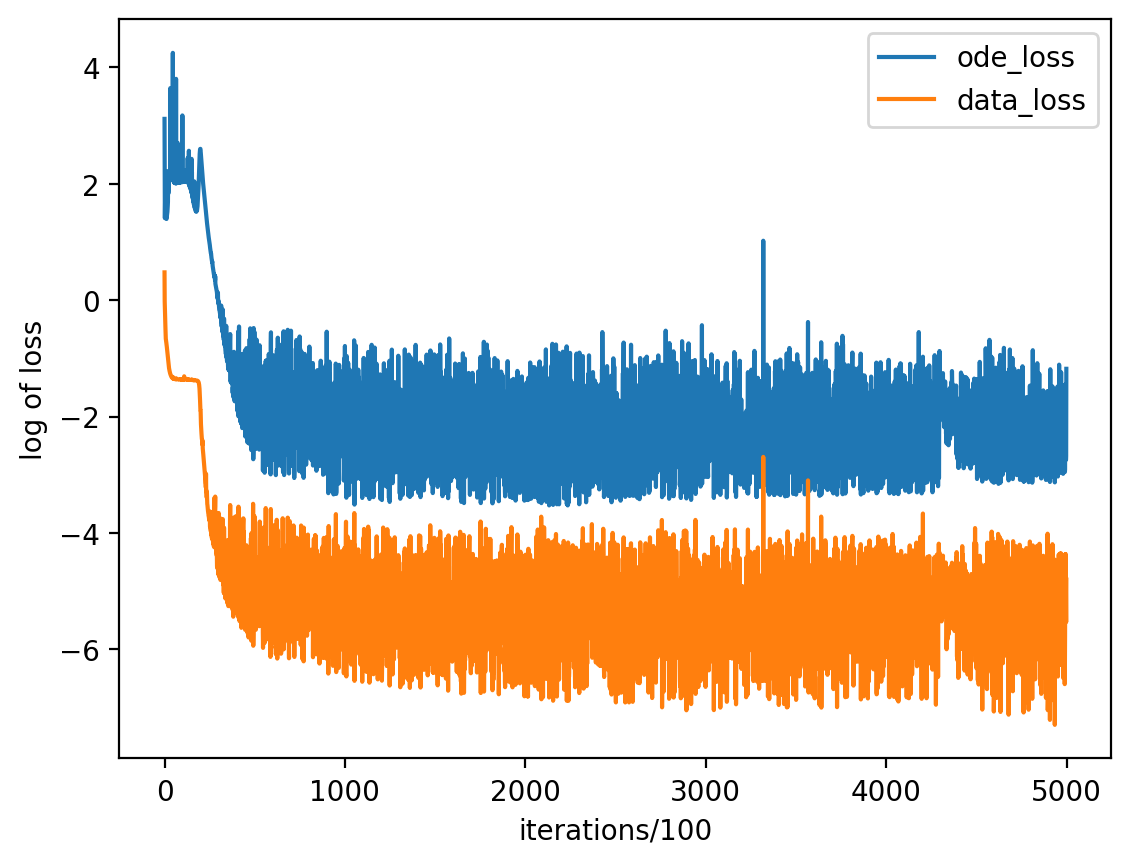

In [18]:
plt.figure(dpi=200)
plt.plot(np.log10(ode_loss)[::100], "-", label="ode_loss")
plt.plot(np.log10(data_loss)[::100], "-", label="data_loss")
# plt.plot(np.log(loss), "-", label="loss")
plt.xlabel('iterations/100')
plt.ylabel('log of loss')
plt.legend()
plt.show()

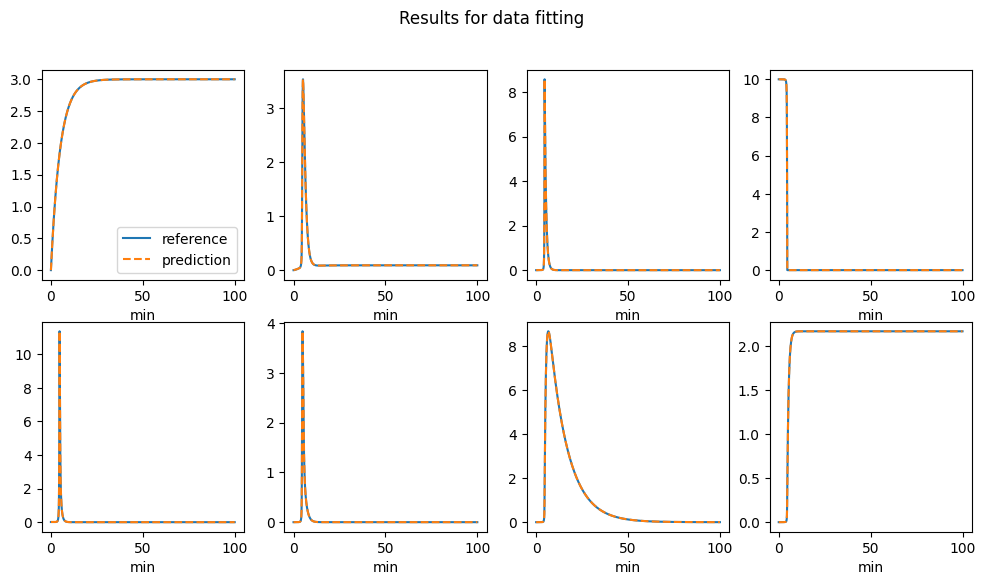

In [19]:
# plt.figure(dpi=100)
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(2, 4, 1)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.xlabel("min")
plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 2)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 3)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 4)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 5)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 6)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 7)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 8)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

plt.suptitle("Results for data fitting")
plt.show()

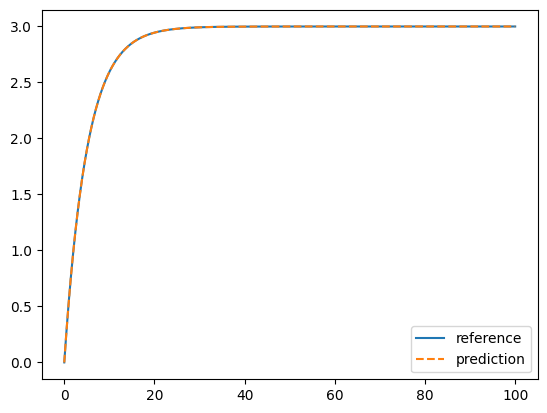

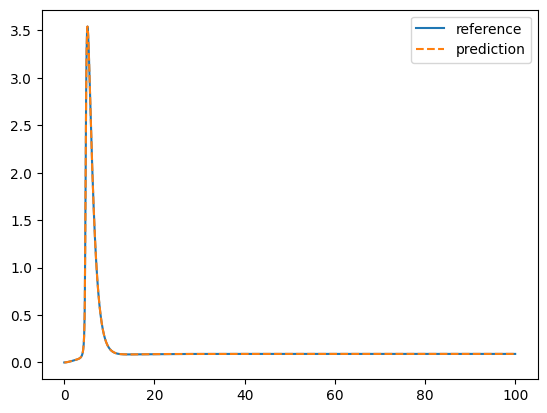

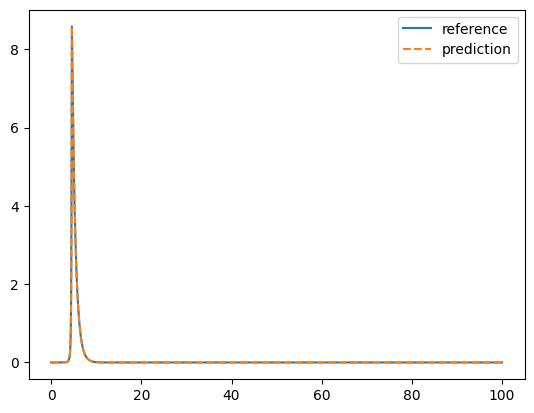

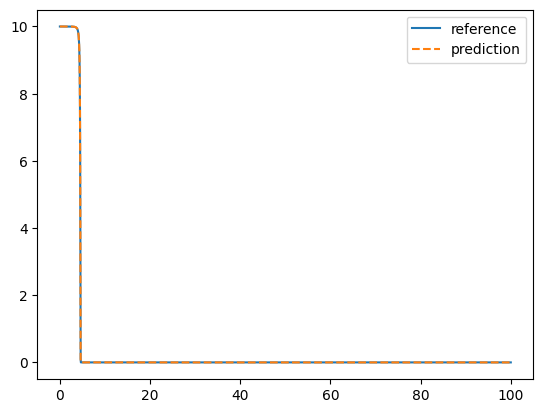

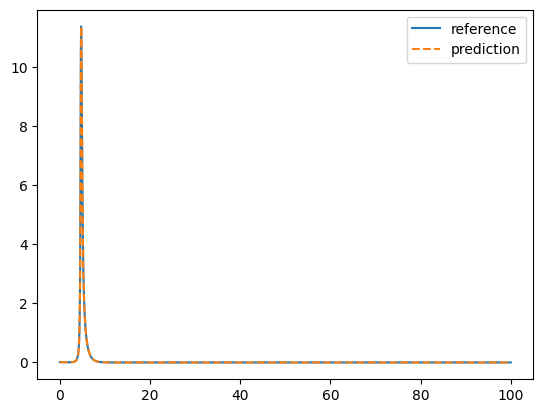

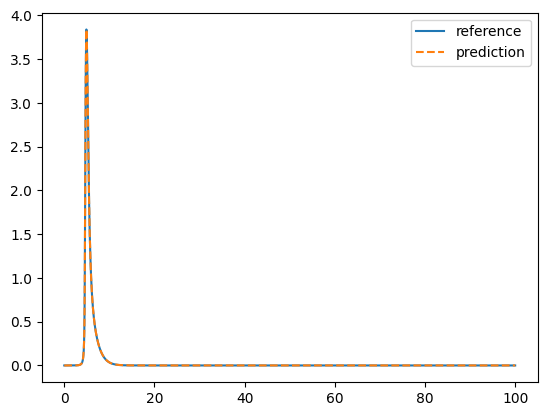

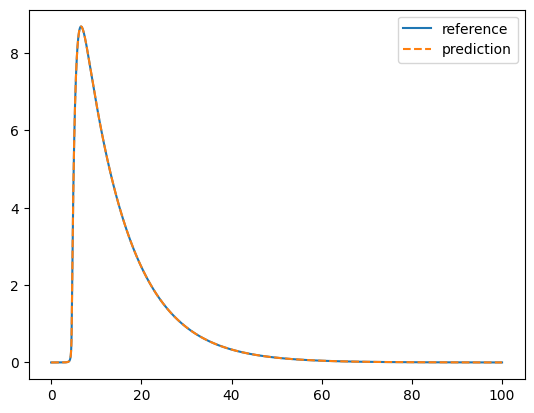

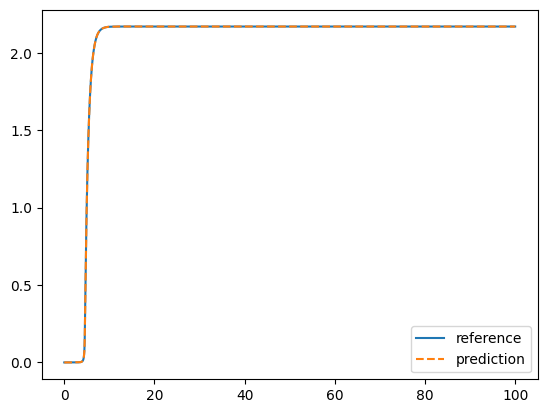

In [20]:
plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.legend()
plt.show()